<a href="https://colab.research.google.com/github/vitor-freitas1/challenge-telecom-x-churn-part2/blob/main/challenge_telecom_x_churn_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🛠️ 1. Preparação dos dados

## 1.1 Extração do Arquivo Tratado

In [14]:
# Import de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# URL do arquivo CSV "Raw" do GitHub
url_dados = 'https://raw.githubusercontent.com/vitor-freitas1/challenge-telecom-x-churn/refs/heads/main/Dados/dados_tratados.csv'

# Carregando os dados diretamente da URL
try:
    df_tratado = pd.read_csv(url_dados)
    print("Arquivo 'dados_tratados.csv' carregado com sucesso diretamente do GitHub!")
except Exception as e:
    print(f"Erro ao carregar os dados da URL: {e}")
    print("Verifique se a URL está correta e se o arquivo existe no repositório.")


# Visualização das 5 primeiras linhas junto da estrutura dos dados
if 'df_tratado' in locals():
    print("\n5 primeiras linhas do DataFrame:")
    display(df_tratado.head())

    print ("\nInformações gerais do DataFrame:")
    df_tratado.info()

Arquivo 'dados_tratados.csv' carregado com sucesso diretamente do GitHub!

5 primeiras linhas do DataFrame:


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.155236
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.967967
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.427926
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.219713
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.756468



Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   int64  
 5   customer_Dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   int64  
 8   phone_MultipleLines        7043 non-null   int64  
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   int64  
 11  internet_OnlineBackup      7043 non-null   int64  
 12  internet_DeviceProtection  7043 non-null   int64  
 13  internet_TechS

## 1.2 Remoção de Colunas Irrelevantes

In [15]:
# Visualização de colunas atuais
print("Colunas antes da remoção:")
print(df_tratado.columns.tolist())
print(f"\nNúmero de colunas antes: {df_tratado.shape[1]}")

# Removendo a coluna de identificação de cliente
df_tratado = df_tratado.drop('customerID', axis=1)

# Confirmando a remoção
print("\n-------------------------------------------")
print("Coluna 'customerID' removida com sucesso!")
print("-------------------------------------------")

print("\nColunas após a remoção:")
print(df_tratado.columns.tolist())
print(f"\nNúmero de colunas agora: {df_tratado.shape[1]}")

Colunas antes da remoção:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total', 'Contas_Diarias']

Número de colunas antes: 22

-------------------------------------------
Coluna 'customerID' removida com sucesso!
-------------------------------------------

Colunas após a remoção:
['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_Tech

## 1.3 Encoding

In [16]:
# Criação de uma cópia do DataFrame, por garantia.
df_encoded = df_tratado.copy()

# identificando as colunas categóricas que ainda não são numéricas
colunas_categoricas = df_encoded.select_dtypes(include=['object']).columns.tolist()

print("Colunas categóricas a serem transformadas:", colunas_categoricas)
print(f"\nNúmero de colunas antes do encoding: {df_encoded.shape[1]}")

# Aplicando one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=colunas_categoricas, drop_first=True, dtype=int)

# Exibindo o resultado
print(f"\nNúmero de colunas após o encoding: {df_encoded.shape[1]}")
print("\nAs 5 primeiras linhas do DataFrame transformado:")
display(df_encoded.head())

print("\nTipos de dados após a transformação:")
df_encoded.info()

Colunas categóricas a serem transformadas: ['customer_gender', 'internet_InternetService', 'account_Contract', 'account_PaymentMethod']

Número de colunas antes do encoding: 21

Número de colunas após o encoding: 25

As 5 primeiras linhas do DataFrame transformado:


,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,...,account_Charges_Total,Contas_Diarias,customer_gender_Male,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,593.30,2.155236,0,0,0,1,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,542.40,1.967967,1,0,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,280.85,2.427926,1,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,1237.85,3.219713,1,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,267.40,2.756468,0,1,0,0,0,0,0,1



Tipos de dados após a transformação:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   int64  
 1   customer_SeniorCitizen                         7043 non-null   int64  
 2   customer_Partner                               7043 non-null   int64  
 3   customer_Dependents                            7043 non-null   int64  
 4   customer_tenure                                7043 non-null   int64  
 5   phone_PhoneService                             7043 non-null   int64  
 6   phone_MultipleLines                            7043 non-null   int64  
 7   internet_OnlineSecurity                        7043 non-null   int64  
 8   internet_OnlineBackup                          7043 non-null   int64  
 9   internet_Devic

## 1.4 Verificação da Proporção de Evasão

Contagem de clientes por classe de Churn:
Churn
0    5174
1    1869
Name: count, dtype: int64

Lembrete: 0 = Não Churn (Permaneceu), 1 = Churn (Evadiu)

Proporção de clientes por classe de Churn (em porcentagem):
Churn
0    73.46
1    26.54
Name: proportion, dtype: float64

--- Avaliação do Desequilíbrio ---
Há um desequilíbrio notável entre as classes. A classe majoritária (Não Churn) representa 73.5% do total.
Isso deve ser levado em conta na avaliação dos modelos.


/tmp/ipython-input-17-2660629752.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_encoded, palette='pastel')


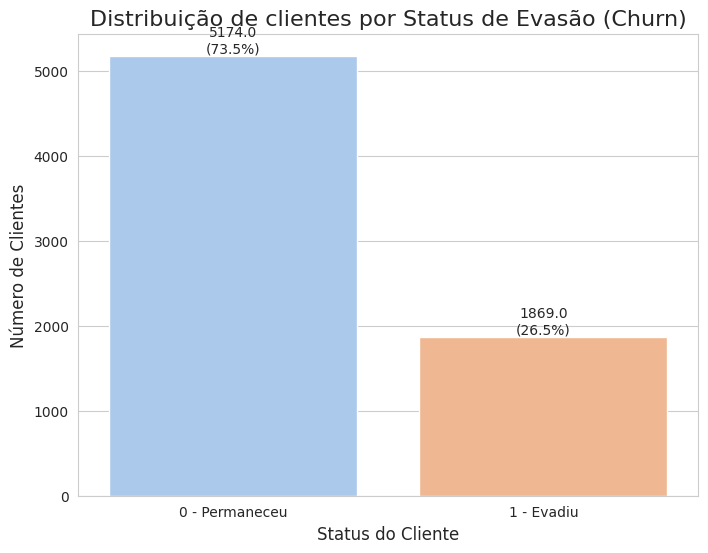

In [17]:
# Verificando a contagem de cada classe na coluna 'Churn'
contagem_churn = df_encoded['Churn'].value_counts()
print("Contagem de clientes por classe de Churn:")
print(contagem_churn)
print("\nLembrete: 0 = Não Churn (Permaneceu), 1 = Churn (Evadiu)")

# Calculando a proporção em porcentagem
proporcao_churn = df_encoded['Churn'].value_counts(normalize=True) * 100
print("\nProporção de clientes por classe de Churn (em porcentagem):")
print(proporcao_churn.round(2))

# Avaliação de desequilíbrio
print ("\n--- Avaliação do Desequilíbrio ---")
if abs(proporcao_churn[0] - proporcao_churn[1]) > 20:
    print("Há um desequilíbrio notável entre as classes. A classe majoritária (Não Churn) representa "
          f"{proporcao_churn[0]:.1f}% do total.")
    print("Isso deve ser levado em conta na avaliação dos modelos.")
else:
    print("O desequilíbrio entre as classes é moderado.")

# Visualização da proporção com um gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df_encoded, palette='pastel')
plt.title('Distribuição de clientes por Status de Evasão (Churn)', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Evadiu'])

# Adicionando os rótulos de contagem e porcentagem
total = len(df_encoded['Churn'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height +3,
            f'{height}\n({(height/total)*100:.1f}%)',
            ha="center", va='bottom')

plt.show()

## 1.5 Normalização ou Padronização

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Usado o df_encoded que foi gerado na etapa de encoding
df_para_escalar = df_encoded.copy()

# --------------------------------------------------------------------------
# PASSO 1: Separação da variável alvo (Churn) das features (preditores)
# --------------------------------------------------------------------------
# A normalização só é aplicada nas features que usarão para prever.
X = df_para_escalar.drop('Churn', axis=1)
y = df_para_escalar['Churn'] # Alvo permanece o mesmo (0s e 1s)

print("Shape das features (X) antes de escalar:", X.shape)
print("Shape do alvo (y):", y.shape)

# --------------------------------------------------------------------------
# PASSO 2: Aplicação da normalização
# --------------------------------------------------------------------------
# Criando o objeto scaler
scaler = MinMaxScaler()

# Aplicando a normalização nas features (X)
# O método fit_transform aprende os parâmetros (min/max) e transforma os dados
X_scaled = scaler.fit_transform(X)

# --------------------------------------------------------------------------
# PASSO 3: Reconstrução do DataFrame para manter a organização
# --------------------------------------------------------------------------
# A saída do scaler é um array NumPy, que será convertido de volta para um
# DataFrame para manter os nomes das colunas, facilitando a análise de
# correlação
df_final = pd.DataFrame(X_scaled, columns=X.columns)

# Exibindo o resultado da normalização
print("\n--- Dados Após a Normalização ---")
print("As 5 primeiras linhas dos dados normalizados:")
display(df_final.head())

print("\nEstatísticas descritivas ('min' é 0 e 'max' é 1 para todas as colunas):")
display(df_final.describe().round(2))

Shape das features (X) antes de escalar: (7043, 24)
Shape do alvo (y): (7043,)

--- Dados Após a Normalização ---
As 5 primeiras linhas dos dados normalizados:


,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,...,account_Charges_Total,Contas_Diarias,customer_gender_Male,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0.0,1.0,1.0,0.125000,1.0,0.0,0.0,1.0,0.0,1.0,...,0.068315,0.471144,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.125000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.062454,0.414428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.055556,1.0,0.0,0.0,0.0,1.0,0.0,...,0.032338,0.553731,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.180556,1.0,0.0,0.0,1.0,1.0,0.0,...,0.142531,0.793532,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.041667,1.0,0.0,0.0,0.0,0.0,1.0,...,0.030789,0.653234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0



Estatísticas descritivas ('min' é 0 e 'max' é 1 para todas as colunas):


,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,...,account_Charges_Total,Contas_Diarias,customer_gender_Male,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
count,7043.00,7043.00,7043.00,7043.00,7043.0,7043.00,7043.00,7043.00,7043.00,7043.00,...,7043.00,7043.00,7043.0,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.16,0.48,0.30,0.45,0.9,0.42,0.29,0.34,0.34,0.29,...,0.26,0.46,0.5,0.44,0.22,0.21,0.24,0.22,0.34,0.23
std,0.37,0.50,0.46,0.34,0.3,0.49,0.45,0.48,0.48,0.45,...,0.26,0.30,0.5,0.50,0.41,0.41,0.43,0.41,0.47,0.42
min,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.12,1.0,0.00,0.00,0.00,0.00,0.00,...,0.05,0.17,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.40,1.0,0.00,0.00,0.00,0.00,0.00,...,0.16,0.52,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,1.00,1.00,0.76,1.0,1.00,1.00,1.00,1.00,1.00,...,0.44,0.71,1.0,1.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00
